# Assignment #3 - Neural Networks

### <font color="red"> DUE: Nov 13 (Friday) 11:00 pm </font>  

<font color="blue"> Akshay Patil </font>

# I. Overview

In this assignment assignment we are implementing the Non Linear models to perform classification and regression task using neural networks.
- In First part we will be performing EDA on our classification and regression data
- Cross validation technique is used to find the best hyper parameters for our Neural Network model
- Later on we are implementing the Non-Linear Regression model for prediction using neural network
- In last part we are implementing the Non-Linear Logistic Regression NN model for the classification purpose.

# II. Data

## Regression Data

### Air Quality data
The data is obtained from UCI repository. It can be found here:https://archive.ics.uci.edu/ml/datasets/Air+Quality# Dataset contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. The data set contains around 10,000 instances and 15 features. Basically 5 metal oxide chemical sensors were deployed to target particular chemicals. [2]

Sensors : Chemicals(Targeted)

Tin Oxide : CO

Titania : NMHC

Tungsten Oxide : NOx

Tungsten Oxide : NO2

Indium Oxide : O3

In [1]:
#Importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the data

The data set is excel file. It is uploaded using pandas module. The data set contains around 10,0000 instances and 15 features in total. This data set can be used to regress the amount of any particular chemical sensed by a sensor in the air like benzene C6H6 for example. Ground Truth horly average for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) is provided by a co-located reference certified analyzer.

Following is the attribute information taken directly from UCI website 
Attribute Information: [3]

We combine the date and time column and make it as a index.( See dataframe info below)
 
 Date (DD/MM/YYYY) _Time (HH.MM.SS) 

0 True hourly averaged concentration CO in mg/m^3 (reference analyzer) 

1 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted) 

2 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 

3 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 

4 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) 

5 True hourly averaged NOx concentration in ppb (reference analyzer) 

6 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 

7 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) 

8 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) 

9 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 

10 Temperature in Â°C 

11 Relative Humidity (%) 

12 AH Absolute Humidity

### Storing the data

In [2]:
#Dataset included in zip flder
df = pd.read_excel('AirQualityUCI.xlsx', parse_dates = [['Date', 'Time']])
df = df.set_index('Date_Time')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 1023.4 KB


### Pre Processing of the data.


This dataset contains (-200) in place of missing values. If we delete this observation we will be left with very few data. so we replaced this missing values with their particular means.

In [3]:
df = df.replace({-200 : np.nan})

In [4]:
df.mean()[:3,] # Two values shown for reference

CO(GT)            2.152750
PT08.S1(CO)    1099.707856
NMHC(GT)        218.811816
dtype: float64

Missing values are filled with their respective means and now our dataset is ready for visualization. We shift our target columns that is Benzene $(C_6H_6)$ at the end

In [5]:
df = df.fillna(df.mean())
df = df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'C6H6(GT)']]

### Data Visualization

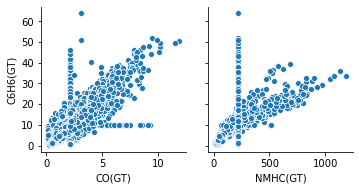

In [6]:
pp = sns.pairplot(data=df,
                  y_vars=['C6H6(GT)'],
                  x_vars=['CO(GT)', 'NMHC(GT)'])

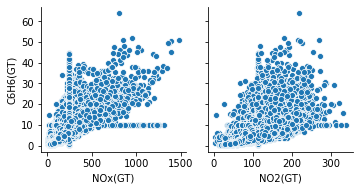

In [7]:
pp = sns.pairplot(data=df,
                  y_vars=['C6H6(GT)'],
                  x_vars=['NOx(GT)','NO2(GT)'])

Comparing Benzene concentration with true concetration of CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2)

From the above comparision plots we can see benzene concentration linearly increases with concentration of CO and Non Metanic Hydrocarbons (NMHC).

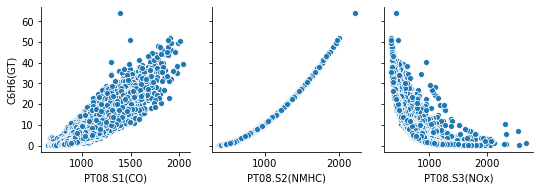

In [8]:
pp = sns.pairplot(data=df,
                  y_vars=['C6H6(GT)'],
                  x_vars=['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)'])

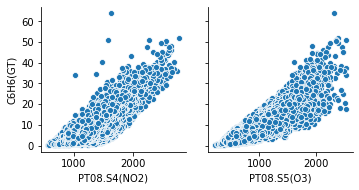

In [9]:
pp = sns.pairplot(data=df,
                  y_vars=['C6H6(GT)'],
                  x_vars=['PT08.S4(NO2)', 'PT08.S5(O3)'])

Comparing Benzene concentration with responses from 5 different sensors for 5 different chemicals. 

Benzene concentration shows strong linearity with responses from sensor 2 which is used to capture NMHC concentration. Also, benzene and NOx are varying exponentially.

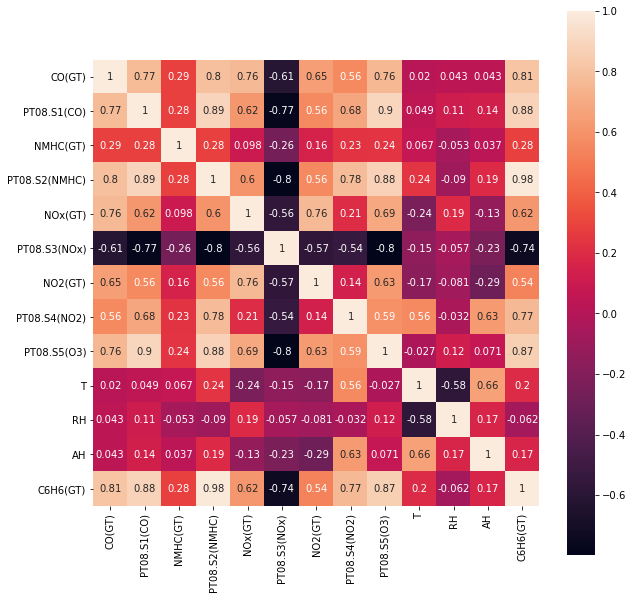

In [10]:
f = plt.subplots(figsize=(10, 10))
corr = df.corr()
sns.heatmap(data=corr, square=True, annot=True,cbar=True)
plt.show()

The correlation heatmap, confirms that our target variable Benzene concentration and responses from sensor 2 (NMHC) have a positive corelation, which suggests as NMHC concentration increases Benzene concentration increases as well. 
Also benzene concentration and responses from sensor 3 ( NOx) are negatively correlated.



### Preliminary observation

After the analysis of the Dataset from the above visualization the following observations can be seen as follows

Benzene concentration and presence of non metanic hydrocarbons is strongly correlated. 

Benzene concentration and presence of Carbon monooxide (CO) is also strongly correlated.

Above observation can be confirmed as Benzene $(C_6H_6)$ is made of Carbon and Hydrogen, the presence of NMHC and Co suggest strong presence of benzene concentration in atmosphere. 

Also as the concentration of NOx increases, concentraion of benzene decreases exponentially.

## Classification Data

###  Bank Loan Status Dataset

The data is obtained from kaggle website. The link for the data set is: https://www.kaggle.com/zaurbegiev/my-dataset  The dataset contains following features: Current Loan amount, Credit score, Annual Income, Years in current Job, Monthly debt and many more. There are total 19 features in the dataset. The data set contains more than 100,000 instances but mostly filled with null values and duplicate values. But considering the computing speed we will be using subset of the data for our analysis.

### Reading the data

The data set is csv file. It is uploaded using pandas module. The data set contains more than 100,000 instances and 19 features in total. This data set contains Loan status as one of the feature which we will be predicting given new instance.

In [11]:
#Importing modules 
import numpy as np
import pandas as pd
df2 = pd.read_csv('credit_train.csv')
df2

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pre Processing of the data.
As we can see there are NaN values present. There are also duplicate values present. So we delete those instances, and we are left with almost 30,000 instances

In [12]:
#Dropping Na values
df2 = df2.dropna()

# Checking for duplicates in Loan ID number and dropping the duplicates

df2 = df2.drop_duplicates(subset = ["Loan ID"])
df2.shape

(29490, 19)

On further observation it can be noticed that there are almost 2000 credit scores which are above 850 which is not possible. Upon closer look we can see they are multiplied by 10 , so we divide those particular scores by 10 and replace them in the model

In [13]:
(df2['Credit Score']> 850).value_counts()
#  False    100514
#  Name: Credit Score, dtype: int64

df2['Credit Score'] = df2['Credit Score'].apply( lambda score: 
                                              (score/10) if score > 850 else score)

As there are lot of instances we will be considering only Long term loans for this model.
The string values in 'Loan status', 'Number of years worked' and others were replaced with their appropriate numerical counterpart. Loan ID and Customer ID are dropped from the model as they are no longer needed.

In this project we will be considering Loans classified as Long Term, so we will be left with around 8000 data set

In [14]:
df2 = df2[df2['Term'].str.contains("Long Term")]
df2.shape

(7923, 19)

We drop the LoanID, customer ID and Term colums as they are no longer relevant for our analysis, Other Variables were also dropped, after checking their correlation with Loan status. Some variables like Tax liens and Bankruptcies had more than 90% instance values as 0 so those were also dropped.

In [15]:
df2 = df2.drop(columns = ['Loan ID', 'Customer ID','Term', "Purpose", "Bankruptcies", "Tax Liens", 
                        "Months since last delinquent", 'Years in current job', "Monthly Debt",
                        "Number of Open Accounts", "Number of Credit Problems" ])

In [16]:
#Now we replace the strings in particular columns with their numerical counterpart"

df2['Loan Status'] = df2['Loan Status'].replace({'Charged Off':-1, 'Fully Paid':1})

df2['Home Ownership'] = df2['Home Ownership'].replace(
    {'Home Mortgage':1, 
     'Rent':2,
    'Own Home':3,
    'HaveMortgage':4,
})
df2.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Home Ownership,Years of Credit History,Current Credit Balance,Maximum Open Credit
17,1,666204.0,723.0,1821967.0,1,22.0,813694.0,2004618.0
20,-1,317108.0,687.0,1133274.0,2,17.4,60287.0,126940.0
25,1,465410.0,688.0,1722654.0,2,22.3,107559.0,488356.0
40,-1,688468.0,682.0,1494616.0,2,16.6,343995.0,843854.0
44,1,311762.0,680.0,2211657.0,1,14.5,213921.0,509652.0


We shift our target columns that is Loan Status at the end. 

In [17]:
df2 = df2[['Current Loan Amount', 'Credit Score', 'Annual Income',
         'Home Ownership','Years of Credit History','Current Credit Balance', 
         'Maximum Open Credit', 'Loan Status']]
df2.head()

,Current Loan Amount,Credit Score,Annual Income,Home Ownership,Years of Credit History,Current Credit Balance,Maximum Open Credit,Loan Status
17,666204.0,723.0,1821967.0,1,22.0,813694.0,2004618.0,1
20,317108.0,687.0,1133274.0,2,17.4,60287.0,126940.0,-1
25,465410.0,688.0,1722654.0,2,22.3,107559.0,488356.0,1
40,688468.0,682.0,1494616.0,2,16.6,343995.0,843854.0,-1
44,311762.0,680.0,2211657.0,1,14.5,213921.0,509652.0,1


### Data Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
groupName = []                                    
count = []
for group_name, subset in df2.groupby('Home Ownership'):
    groupName.append(group_name)
    count.append(len(subset))
print(groupName)
print(count)

[1, 2, 3, 4]
[4709, 2532, 677, 5]


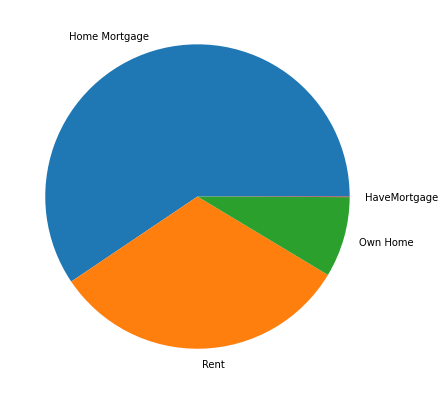

In [20]:
plt.figure(figsize = (7, 7))
plt.pie(count, labels = ("Home Mortgage","Rent","Own Home","HaveMortgage"))
plt.show()

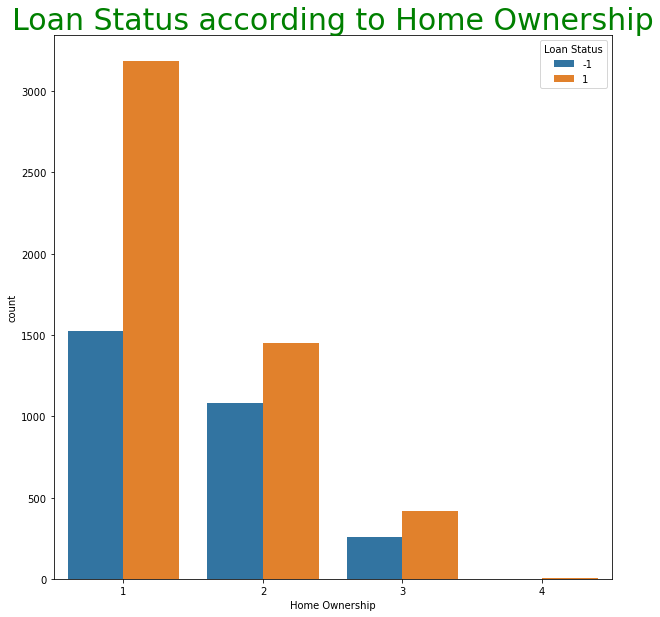

In [21]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(df2['Home Ownership'],hue=df2['Loan Status'])
plt.title("Loan Status according to Home Ownership", color = 'green', fontsize = 30)
plt.show()

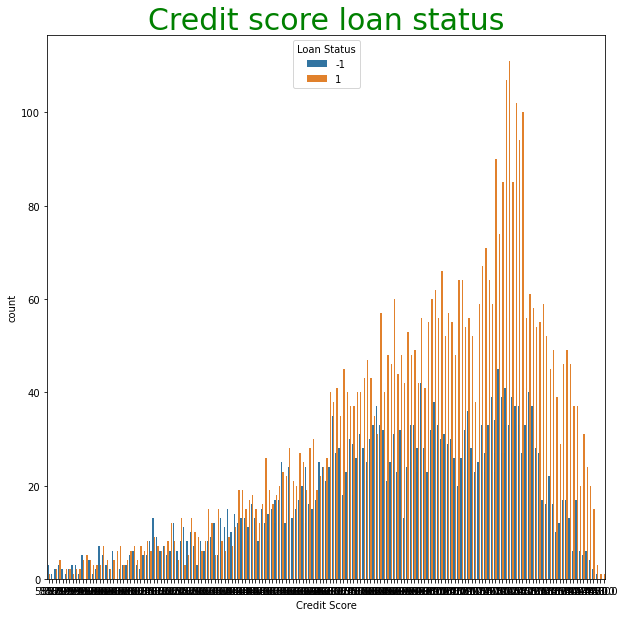

In [22]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(df2['Credit Score'],hue=df2['Loan Status'])
plt.title("Credit score loan status", color = 'green', fontsize = 30)
plt.show()

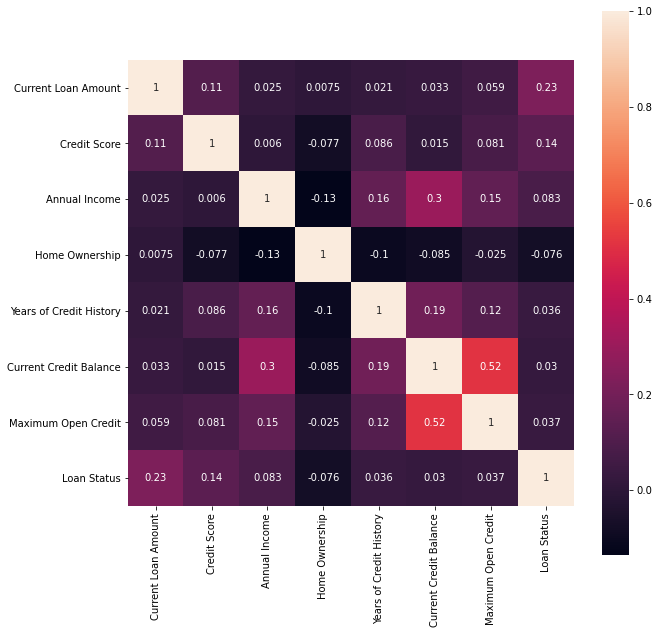

In [23]:
f = plt.subplots(figsize=(10, 10))
corr = df2.corr()
sns.heatmap(data=corr, square=True, annot=True,cbar=True)
plt.show()

### Preliminary Observation

Visualization of data has been performed above and the following are the observations that we can observe from the visualizations performed above

- There are large number of people who have home mortgage compared to other people in the dataset. Followed by Rent , and then who own home and there are only 5 who have mortgage.

- According to Home ownership and loan status plot, we can see people who have home mortgage are more likely to repay their loans followed by those who stay on rent.

- The credit score loan status plot suggest that people having high credit score are more likely to repay their loans.

- The heat map shows the degree of correlation that exists between the different feature variables present in the dataset where current loan amount and credit history is relatively highly correlated to loan status as compared to other variables.

In [24]:
df.head()


,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,C6H6(GT)
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150.0,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,11.881723
2004-03-10 19:00:00,2.0,1292.25,112.0,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,9.397165
2004-03-10 20:00:00,2.2,1402.00,88.0,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,8.997817
2004-03-10 21:00:00,2.2,1375.50,80.0,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,9.228796
2004-03-10 22:00:00,1.6,1272.25,51.0,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,6.518224


In [25]:
df2.tail()

,Current Loan Amount,Credit Score,Annual Income,Home Ownership,Years of Credit History,Current Credit Balance,Maximum Open Credit,Loan Status
99863,352066.0,671.0,969855.0,2,10.1,187378.0,442772.0,-1
99894,403898.0,689.0,874532.0,3,12.7,156978.0,288090.0,-1
99915,558624.0,707.0,1320956.0,2,22.9,464075.0,1017720.0,-1
99919,134222.0,702.0,772844.0,2,15.1,151962.0,212520.0,-1
99950,486046.0,695.0,1440827.0,1,33.5,633631.0,937024.0,-1


# III. Methods

## III.A 5-fold Cross Validation

Cross-validation, sometimes called rotation estimation,or out-of-sample testing is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. In a prediction problem, a model is usually given a dataset of known data on which training is run (training dataset), and a dataset of unknown data (or first seen data) against which the model is tested (called the validation dataset or testing set).

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

One round of cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set or testing set). To reduce variability, in most methods multiple rounds of cross-validation are performed using different partitions, and the validation results are combined (e.g. averaged) over the rounds to give an estimate of the model's predictive performance.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=5 which is usually referred as 5-fold cross-validation.

In summary, cross-validation combines (averages) measures of fitness in prediction to derive a more accurate estimate of model prediction performance.

### 5 Fold Cross Validation

In K Fold cross validation, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get total effectiveness of our model.

As can be seen, every data point gets to be in a validation set exactly once, and gets to be in a training set k-1 times. This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set. Interchanging the training and test sets also adds to the effectiveness of this method.

As a general rule and empirical evidence, K = 5 or 10 is generally preferred, but nothing’s fixed and it can take any value.

Cross Validation is a very useful technique for assessing the effectiveness of your model, particularly in cases where you need to mitigate overfitting. It is also of use in determining the hyper parameters of your model, in the sense that which parameters will result in lowest test error.

I have implemented the k fold cross validation fucntion in this jupyter notebook in the following modules Non Linear Regression and Non Linear Logistic Regression to find good neural network parameters including the structure to report the CV accuracies.

## III.B Nonlinear Regression 


### Summary of nonlinear regression
In statistics, nonlinear regression is a form of regression analysis in which observational data are modeled by a function which is a nonlinear combination of the model parameters and depends on one or more independent variables. The data are fitted by a method of successive approximations.

Nonlinear regression is a form of regression analysis in which data is fit to a model and then expressed as a mathematical function. Simple linear regression relates two variables (X and Y) with a straight line (y = mx + b), while nonlinear regression must generate a line (typically a curve) as if every value of Y was a random variable.

The goal of the model is to reduce the cost function which in this case is the sum of squared residuals. The residual sum of squares is a measure that tracks how much observations vary from the mean of the data set. It is computed by first finding the difference between the mean and every point of data in the set. Then, each of those differences is squared.

Lastly, all of the squared figures are added together. The smaller the sum of these squared figures, the better the function fits the data points in the set. Nonlinear regression uses logarithmic functions, trigonometric functions, exponential functions, and other fitting methods.

Nonlinear regression modeling is similar to linear regression modeling in that both seek to graphically track a particular response from a set of variables. Nonlinear models are more complicated than linear models to develop because the function is created through a series of approximations (iterations) that may stem from trial-and-error.



Analysing the correlation heatmap, we will be using four predictors namely, CO(GT), PT08.S1(CO)		PT08.S2(NMHC), PT08.S5(O3) to predict the $C_6H_6$ (GT)

In [26]:
df.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH', 'C6H6(GT)'],
      dtype='object')

In [27]:
df1 = df.drop(columns=['NMHC(GT)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'T', 'RH',
       'AH'])

In [28]:
df1.head()

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S5(O3),C6H6(GT)
Date_Time,,,,,
2004-03-10 18:00:00,2.6,1360.00,1045.50,1267.50,11.881723
2004-03-10 19:00:00,2.0,1292.25,954.75,972.25,9.397165
2004-03-10 20:00:00,2.2,1402.00,939.25,1074.00,8.997817
2004-03-10 21:00:00,2.2,1375.50,948.25,1203.25,9.228796
2004-03-10 22:00:00,1.6,1272.25,835.50,1110.00,6.518224


In [29]:
df1.shape

(9357, 5)

In [30]:
data = df1.sample(9357)

In [31]:
X=data.iloc[:,0:-1]
X.shape

(9357, 4)

In [32]:
T=data.iloc[:,-1]
T= T.values.reshape(T.shape[0],1)
T.shape

(9357, 1)

In [33]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu

In [34]:
""" Neural Network 
        referenced NN code by Chuck Anderson in R and C++ 

                                by Jake Lee (lemin)

    example usage:
        X = numpy.array([0,0,1,0,0,1,1,1]).reshape(4,2)
        T = numpy.array([0,1,1,0,1,0,0,1]).reshape(4,2)

        nn = nnet.NeuralNet([2,3,2])
        nn.train(X,T, wprecision=1e-20, fprecision=1e-2)
        Y = nn.use(X)

"""
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 400)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [35]:
nn = NeuralNet([4,32,1])
nn.train(X,T)
Y = nn.use(X)

<ipython-input-34-e49175c21ec5>:110: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


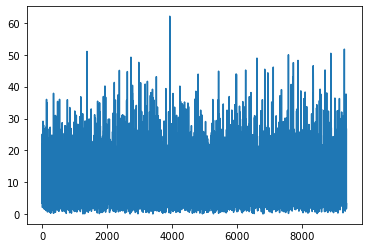

In [36]:
plt.plot(Y)

###  Cross Validation for Non Linear Regression

In [37]:
X=data.loc[:,['CO(GT)','PT08.S1(CO)','PT08.S2(NMHC)','PT08.S5(O3)']].values
mux = np.mean(X,0)  
sigmax = np.std(X,0)
X= (X - mux) / sigmax 
X.shape

(9357, 4)

In [38]:
T=data.loc[:,["C6H6(GT)"]]
mu = np.mean(T,0)  
sigma = np.std(T,0)
T = (T - mu) / sigma 
T= T.values.reshape(T.shape[0],1)
T.shape

(9357, 1)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, T, test_size=0.2, random_state=0)

In [40]:
import sklearn
from sklearn.model_selection import KFold
def cross_validation(xdata,ydata,nfolds,layers):
    errors = []
    testErrs = []
    xdata=xdata[0:1000]   
    i = 0
    print(xdata)
    
    if len(xdata)/nfolds >= 1 and len(ydata)/nfolds >= 1:
        kf = KFold(n_splits = nfolds)
        
        
    for train_index, test_index in kf.split(xdata):
        
        residual=[]
        para=[]    
        
        kf_val = KFold(n_splits = nfolds-1)
        x_temp = xdata[train_index]
        
        X_train_cv = np.array(xdata)[train_index]
        X_test_cv = np.array(xdata)[test_index]
            
        Y_train_cv = np.array(ydata)[train_index]
        Y_test_cv = np.array(ydata)[test_index]
        
        
        for train_index_val,validation_index in kf_val.split(x_temp):

            X_train_new = np.array(x_temp)[train_index_val]
            X_val_new = np.array(x_temp)[validation_index]
            
            Y_train_new = np.array(ydata)[train_index_val]
            Y_val_new = np.array(ydata)[validation_index]
            
            max_acc = 0
            n_col=np.array(xdata.shape)[1]
            for neurons in layers:
                net = NeuralNet([n_col,neurons,1])
                net.train( X_train_new, Y_train_new)
                classes = net.use(X_val_new)
                accuracy = 100 - np.mean(np.abs(Y_val_new - classes)) * 100
                
                if accuracy > max_acc:
                    max_acc = accuracy 
                
                residual.append(accuracy)
                para.append(neurons)
                
                
        print(i+1,"th iteration done")
        i+=1
        best_acc = max(residual)
        minInd = residual.index(best_acc)
        weight = para[minInd]
        errors.append([weight,best_acc])
        print(errors)
        print("*************************************")
        net_cv = NeuralNet([n_col,weight,1])
        net_cv.train(X_train_cv, Y_train_cv)
        classes = net_cv.use(X_test_cv)
        test_err = 100 - np.mean(np.abs(Y_test_cv - classes))
        testErrs.append([weight,test_err])
        import matplotlib .pyplot as plt
        fig,ax = plt.subplots()
        ax.scatter(Y_val_new,classes,edgecolors=(0,0,0))
        ax.plot([Y_val_new.min(),Y_val_new.max()],[Y_val_new.min(),Y_val_new.max()],'k--',lw=4)
        ax.set_xlabel('Measured')
        ax.set_ylabel('Predicted')
        plt.show()
    
    return testErrs

In [41]:
X_train = X[0:9357]
T_train = T[0:9357]
print("Train Shape Check:", X_train.shape, T_train.shape)

Train Shape Check: (9357, 4) (9357, 1)


In [42]:
X_test = X[0:9357]
T_test = T[0:9357]
print("Test Shape Check:", X_test.shape, T_test.shape)

Test Shape Check: (9357, 4) (9357, 1)


[[ 7.95784239e-01  1.28670946e+00  1.14692340e+00  1.30436447e+00]
 [-3.37454323e-16 -8.70400068e-01 -1.01523770e+00 -4.96125489e-01]
 [ 1.02374811e+00  7.39207806e-01  6.47007285e-01  6.76465199e-01]
 ...
 [ 1.40368791e+00  1.26673623e+00  1.55507671e+00  1.49702266e+00]
 [ 9.47760156e-01  3.09195775e-01  1.24728897e+00  1.22755722e+00]
 [ 1.55566382e+00  3.58541418e-01  8.50606009e-01  8.70403506e-01]]


<ipython-input-34-e49175c21ec5>:110: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


1 th iteration done
[[7, 20.80771227366141]]
*************************************


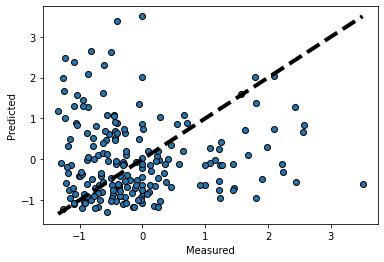

2 th iteration done
[[7, 20.80771227366141], [9, 21.196797123817007]]
*************************************


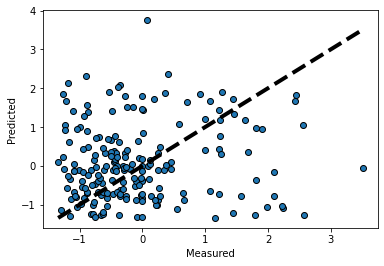

3 th iteration done
[[7, 20.80771227366141], [9, 21.196797123817007], [11, 41.60180765553223]]
*************************************


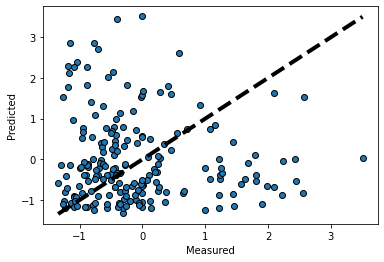

4 th iteration done
[[7, 20.80771227366141], [9, 21.196797123817007], [11, 41.60180765553223], [11, 74.09873538917543]]
*************************************


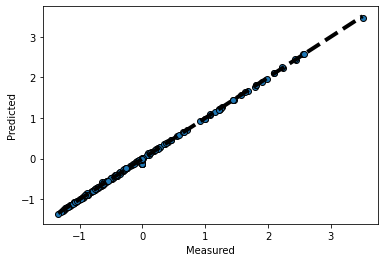

5 th iteration done
[[7, 20.80771227366141], [9, 21.196797123817007], [11, 41.60180765553223], [11, 74.09873538917543], [9, 98.81412232075499]]
*************************************


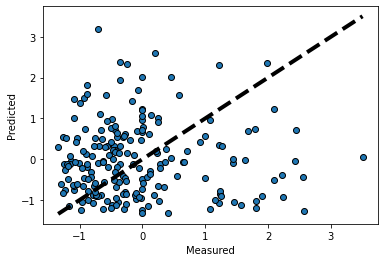

In [43]:
layers=[7,9,10,11,12]
cross=cross_validation(X,T,5,layers)

In [44]:
n_col=np.array(X_train.shape)[1]
best_para = max(cross,key = lambda x:x[1])
final_train_nn = NeuralNet([n_col,best_para[0],1])
final_train_nn.train(X_train, T_train,ftracep=True)
predicted_values = final_train_nn.use(X_test)
acc = 100 - np.mean(np.abs(T_test - predicted_values)) *100
rmse_error =np.sqrt(np.sum((T_test-predicted_values)**2))
print("RMS error is :",rmse_error)
print("Accuracy is :",acc)

<ipython-input-34-e49175c21ec5>:110: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


RMS error is : 2.465622101584935
Accuracy is : 98.73804172081218


### Explanation of code

### NeuralNet Class


- init( ) : This function initializes all the necessary variables for building a neural network and for the working of it.


- add_ones( ): This function is used to add bias term to the inpurt matrix and the weights.


- pack( ) and unpack( ): This function actually packs the multiple weights in to one vector vice a versa is the unpack function


- RDF( ): This is the activation function which have been used in the neural net class


- get_nlayers( ) and set_hunit( ): This function are used to get the hidden layers and the number of layers in the Neural Net class


- train( ): It preprocesses the inputs and then trains it. This function is also recursive function which calls itself. The target data that is being passed to this function is an indicator matrix which represents of the classes of the data in separate columns.


- use( ): The test data is passed to this function for making the predictions.

### Presentation of CV results

[[ 7.95784239e-01  1.28670946e+00  1.14692340e+00  1.30436447e+00]
 [-3.37454323e-16 -8.70400068e-01 -1.01523770e+00 -4.96125489e-01]
 [ 1.02374811e+00  7.39207806e-01  6.47007285e-01  6.76465199e-01]
 ...
 [ 1.40368791e+00  1.26673623e+00  1.55507671e+00  1.49702266e+00]
 [ 9.47760156e-01  3.09195775e-01  1.24728897e+00  1.22755722e+00]
 [ 1.55566382e+00  3.58541418e-01  8.50606009e-01  8.70403506e-01]]


<ipython-input-34-e49175c21ec5>:110: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


1 th iteration done
[[10, 22.117786016750557]]
*************************************


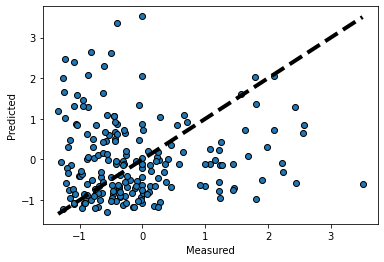

2 th iteration done
[[10, 22.117786016750557], [7, 19.369944652053846]]
*************************************


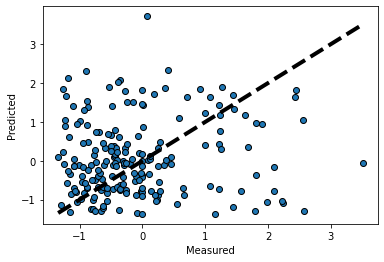

3 th iteration done
[[10, 22.117786016750557], [7, 19.369944652053846], [9, 42.56912009577501]]
*************************************


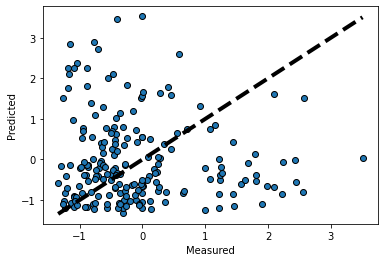

4 th iteration done
[[10, 22.117786016750557], [7, 19.369944652053846], [9, 42.56912009577501], [10, 71.71547495134395]]
*************************************


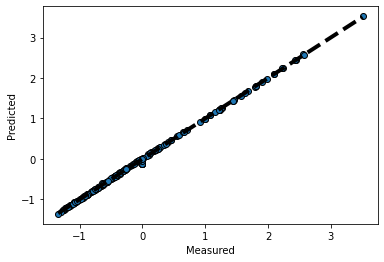

5 th iteration done
[[10, 22.117786016750557], [7, 19.369944652053846], [9, 42.56912009577501], [10, 71.71547495134395], [10, 98.92237310128675]]
*************************************


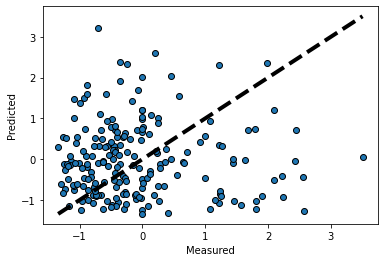

[[10, 99.98720492023999],
 [7, 99.98545627480073],
 [9, 99.98757924414582],
 [10, 99.98580197957475],
 [10, 99.98818667493633]]

In [45]:
layers=[7,9,10,11,12]
cross=cross_validation(X,T,5,layers)
cross

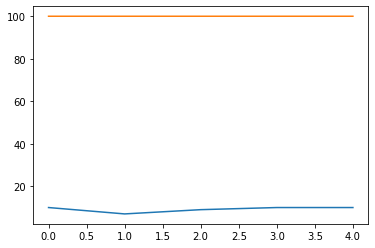

In [46]:
plt.plot(cross)

### Plots for Results

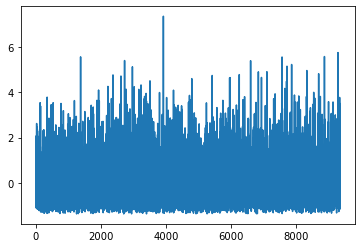

In [47]:
plt.plot(T)
plt.show()

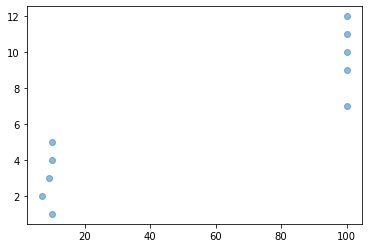

In [48]:
M= [(1,7),(2,9),(3,10),(4,11),(5,12)]
plt.scatter(cross, M, alpha=0.5)
plt.show()

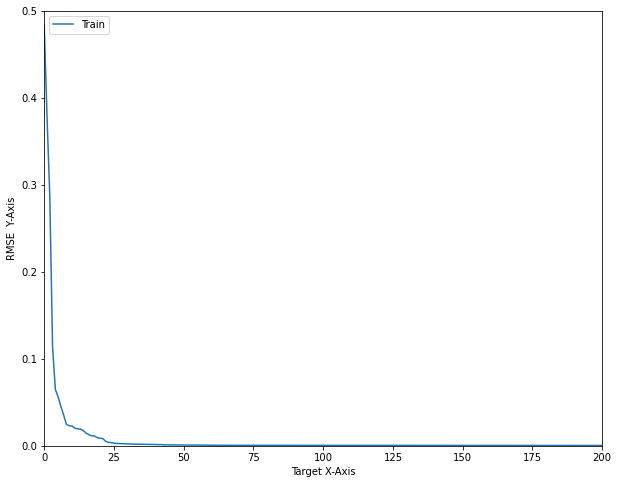

In [49]:
plt.figure(figsize=(10,8))
plt.plot(final_train_nn.ftrace)
plt.ylim(0,0.5)
plt.xlim(0, 200)
plt.xlabel('Target X-Axis')
plt.ylabel('RMSE  Y-Axis')
plt.legend(('Train','Test'),loc='upper left')
plt.show()

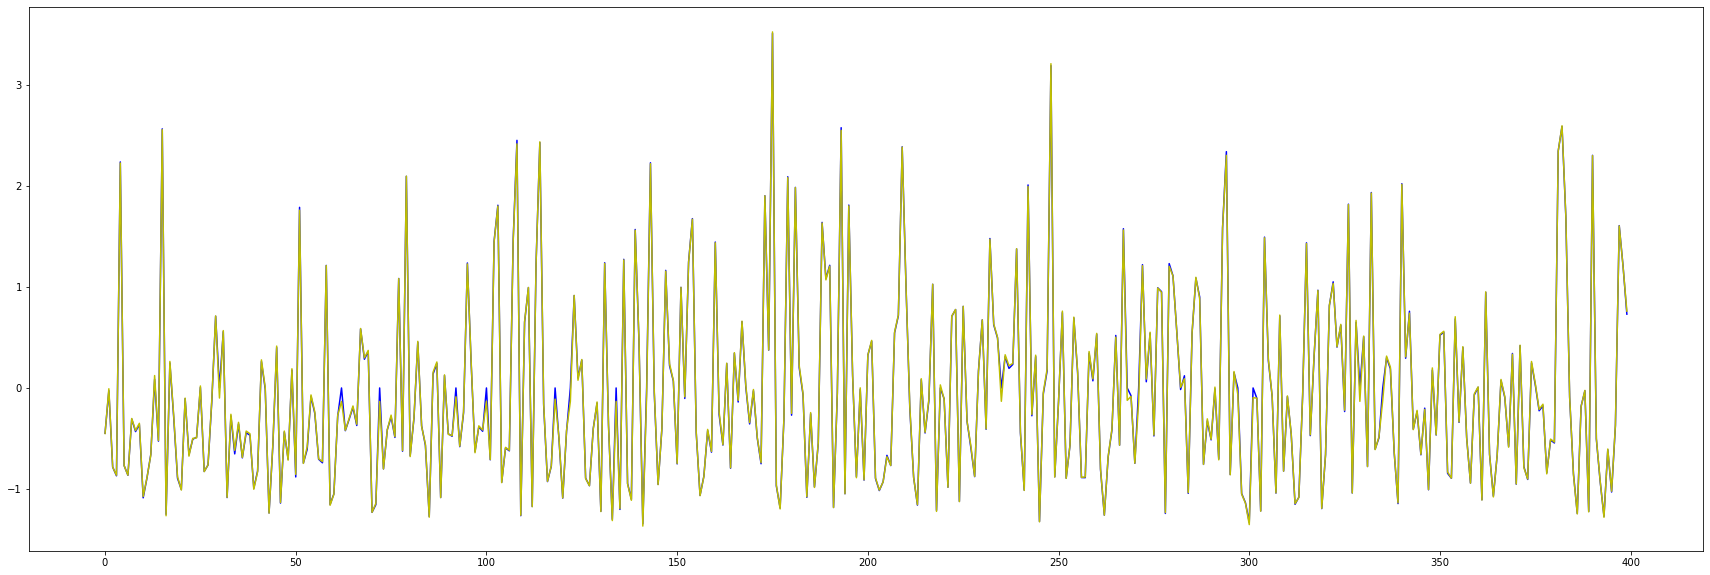

In [50]:
plt.figure(figsize=(30,10))
plt.plot(T_test[600:1000],'-b')
plt.plot(predicted_values[600:1000],'-y')

## III.C Nonlinear Logistic Regression

### Summarize the nonlinear logistic regression model. 


Previously, we learned the linear logistic regression that uses the softmax layer for classification along with a linear model. 

$$
g_k(x) = P(T=k \mid x) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

By using this softmax function, we were able to generate probablistic outputs for all classes. To handle multi-label classes, we use the indicator target labels for training to update the weights for the linear model. 
Following the derivation, we have achieved the following update rule: 



$$
w_j \leftarrow wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(x_n)\Big) x_n.
$$

To update the weights with batch samples, we can convert this update rule in matrix form as follows:

$$
w \leftarrow w + \alpha X^\top \Big(  T - g(X)\Big).
$$

Remember we start from the error function below for the derivation bvefore:

$$
E(w) = - \ln P(T \mid w) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$


#### Summary (Regression vs Classification)


<table>
<tr>
<th></th>
<th width=45%> Regression </th>
<th width=45%> Classification </th>
</tr>
<tr>
<td>
Forward Pass 
</td>
<td>
$$
\begin{align}
Zm &= h(Xlm \cdot Vm) \\
\\
Ym & = Zlm \cdot Wm 
\end{align}
$$
</td>
<td>
$$
\begin{align}
Zm &= h(Xlm \cdot Vm) \\
\\
Ym & = Zlm \cdot Wm \\
Gm & = softmax(Ym)
\end{align}
$$
</td>
</tr>
<tr>
<td>
 Backward Pass 
</td>
<td>
$$
\begin{align}
Vm &\leftarrow Vm + \alpha_h \frac{1}{N} \frac{1}{K} Xlm^\top \Big( (Tm - Ym) Wm^\top \odot (1 - Zm^2) \Big) \\
Wm &\leftarrow Wm + \alpha_o \frac{1}{N} \frac{1}{K} Zlm^\top \Big( Tm - Ym \Big) 
\end{align}
$$
</td>
<td>
$$
\begin{align}
Vm &\leftarrow Vm + \alpha_h Xlm^\top \Big( (Tm - Gm) Wm^\top \odot (1 - Zm^2) \Big)\\
Wm &\leftarrow Wm + \alpha_o Zlm^\top \Big(  Tm - Gm\Big) 
\end{align}
$$
</td>
</tr>
<tr>
<td></td>
<td></td>
<td>
Note: Here $Tm$ is a matrix with indicator variable outputs, <br/>
and $Gm$ is the output matrix after the softmax layer.</td>
</tr>
</table> 

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
df2.head()

,Current Loan Amount,Credit Score,Annual Income,Home Ownership,Years of Credit History,Current Credit Balance,Maximum Open Credit,Loan Status
17,666204.0,723.0,1821967.0,1,22.0,813694.0,2004618.0,1
20,317108.0,687.0,1133274.0,2,17.4,60287.0,126940.0,-1
25,465410.0,688.0,1722654.0,2,22.3,107559.0,488356.0,1
40,688468.0,682.0,1494616.0,2,16.6,343995.0,843854.0,-1
44,311762.0,680.0,2211657.0,1,14.5,213921.0,509652.0,1


In [53]:
def normalize(X):
    return (X/X.max())

In [54]:
df2["Current Loan Amount"] = normalize(df2["Current Loan Amount"])
df2["Credit Score"] = normalize(df2["Credit Score"])
df2["Annual Income"] = normalize(df2["Annual Income"])
df2["Home Ownership"] = normalize(df2["Home Ownership"])
df2["Years of Credit History"] = normalize(df2["Years of Credit History"])
df2["Current Credit Balance"] = normalize(df2["Current Credit Balance"])
df2["Maximum Open Credit"] = normalize(df2["Maximum Open Credit"])

In [55]:
df2.head()

,Current Loan Amount,Credit Score,Annual Income,Home Ownership,Years of Credit History,Current Credit Balance,Maximum Open Credit,Loan Status
17,0.006662,0.964000,0.059080,0.25,0.379310,0.125396,0.023148,1
20,0.003171,0.916000,0.036748,0.50,0.300000,0.009291,0.001466,-1
25,0.004654,0.917333,0.055860,0.50,0.384483,0.016576,0.005639,1
40,0.006885,0.909333,0.048465,0.50,0.286207,0.053012,0.009744,-1
44,0.003118,0.906667,0.071716,0.25,0.250000,0.032967,0.005885,1


In [103]:
data = df2.sample(7923)
data.head()

,Current Loan Amount,Credit Score,Annual Income,Home Ownership,Years of Credit History,Current Credit Balance,Maximum Open Credit,Loan Status
46036,0.004592,0.913333,0.042864,0.25,0.562069,0.032835,0.014316,-1
45399,0.002872,0.905333,0.042694,0.25,0.312069,0.011902,0.002017,1
69553,0.007632,0.904000,0.139846,0.75,0.531034,0.090432,0.025641,1
73860,0.002167,0.977333,0.084961,0.50,0.265517,0.024657,0.003327,-1
28536,0.007729,0.928000,0.049728,0.25,0.317241,0.027913,0.002979,1


In [116]:
X=data.iloc[:,0:-1].values

X.shape

(7923, 7)

In [117]:
T=data.iloc[:,-1].values

T = T.reshape(T.shape[0],1)
T.shape

(7923, 1)

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.5, random_state=42)

In [119]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        NeuralNet.__init__(self,nunits)

   
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
            
        f = np.exp(z) 
        
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f)) 
    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        t,z = NeuralNet.forward(self,X)
        return self.softmax(t),z

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        epsilon=1e-12
    
        Y = np.clip(Y, epsilon, 1. - epsilon)
       
        N = Y.shape[0]
       
        ce = -np.sum(np.sum(T*np.log(Y+1e-9)))
        
        return ce

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        NeuralNet.train(self,X,T)

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        Xs = X
       
        classes, probabilities = self.forward(Xs)
        
        if self.stdT is None:
            classes = self.stdT.unstandardize(classes)
            
        return np.argmax(classes,1),probabilities,classes

### Examination of correct implementation (NonlinearLogReg) with toy data.

Text(0.5, 1.0, 'test data set')

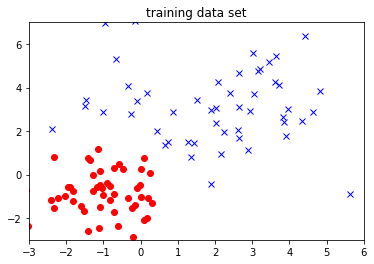

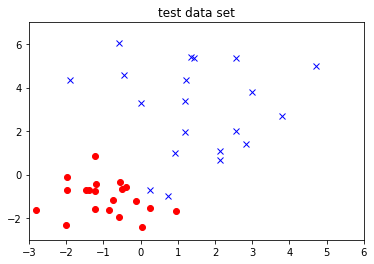

In [136]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [137]:
clsf = NeuralNetLogReg([2, 3, 2])
clsf.train(Xtrain, Ttrain)
classes, Y, Z = clsf.use(Xtest)

/Users/AkshayPatil/Desktop/ML-ITCS-6156/Assignments/Assig3/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
<ipython-input-119-6189e3724251>:19: RuntimeWarning: invalid value encountered in true_divide
  return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))


In [138]:
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

Accuracy:  97.5 %


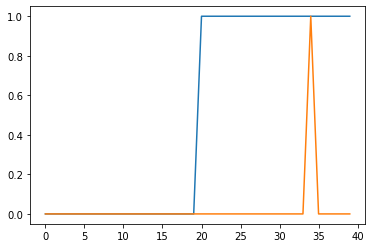

In [139]:
plt.plot(Ttest)
plt.plot(classes)

Tl = np.argmax(Ttest,1)

print("Accuracy: ", 100 - np.mean(np.abs(Tl - classes)) * 100, "%")

In [140]:
import sklearn
from sklearn.model_selection import KFold
def cross_validations(xdata,ydata,nfolds,layers):
    errors = []
    testErrs = []
    xdata=xdata[0:1000]   
    i = 0
    print(xdata)
    
    if len(xdata)/nfolds >= 1 and len(ydata)/nfolds >= 1:
        kf = KFold(n_splits = nfolds)
        
        
    for train_index, test_index in kf.split(xdata):
        
        residual=[]
        para=[]    

        
        kf_val = KFold(n_splits = nfolds-1)
        x_temp = xdata[train_index]
        
        
        X_train_cv = np.array(xdata)[train_index]
        X_test_cv = np.array(xdata)[test_index]
            
        Y_train_cv = np.array(ydata)[train_index]
        Y_test_cv = np.array(ydata)[test_index]
        
        
        for train_index_val,validation_index in kf_val.split(x_temp):

            X_train_new = np.array(x_temp)[train_index_val]
            X_val_new = np.array(x_temp)[validation_index]
            
            Y_train_new = np.array(ydata)[train_index_val]
            Y_val_new = np.array(ydata)[validation_index]
            
            n_col=np.array(xdata.shape)[1]
            for neurons in layers:
                net = NeuralNetLogReg([n_col,neurons,2])
                net.train(X_train_new, Y_train_new)
                classes,q,w = net.use(X_val_new)
                accuracy = 100 - np.mean(np.abs(Y_val_new - classes)) * 100
                residual.append(accuracy)
                para.append(neurons)
                
                
        print(i+1,"th iteration done")
        i+=1
        best_acc = max(residual)
        minInd = residual.index(best_acc)
        weight = para[minInd]
        errors.append([weight,best_acc])
        print(errors)
        print("----------------------------------")
        net_cv = NeuralNetLogReg([n_col,weight,2])
        net_cv.train(X_train_cv, Y_train_cv)
        classes,q,w = net_cv.use(X_test_cv)
        test_err = 100 - np.mean(np.abs(Y_test_cv - classes))
        testErrs.append([weight,test_err])
    
    return testErrs

In [170]:
layers=[9,10,11,12,13]
cross=cross_validations(X,T,5,layers)
print(cross)

[[0.00459184 0.91333333 0.04286414 ... 0.56206897 0.03283489 0.01431584]
 [0.00287232 0.90533333 0.0426941  ... 0.31206897 0.01190243 0.0020171 ]
 [0.00763224 0.904      0.13984616 ... 0.53103448 0.09043209 0.02564082]
 ...
 [0.00427394 0.872      0.04245998 ... 0.20689655 0.04202596 0.00964602]
 [0.00271986 0.90533333 0.02616898 ... 0.45172414 0.01348063 0.00179964]
 [0.00767778 0.988      0.13514961 ... 0.37758621 0.01046184 0.01564829]]


<ipython-input-119-6189e3724251>:19: RuntimeWarning: invalid value encountered in true_divide
  return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
<ipython-input-119-6189e3724251>:17: RuntimeWarning: overflow encountered in exp
  f = np.exp(z)


1 th iteration done
[[10, 31.0]]
----------------------------------
2 th iteration done
[[10, 31.0], [10, 31.0]]
----------------------------------
3 th iteration done
[[10, 31.0], [10, 31.0], [11, 31.0]]
----------------------------------
4 th iteration done
[[10, 31.0], [10, 31.0], [11, 31.0], [9, 31.0]]
----------------------------------
5 th iteration done
[[10, 31.0], [10, 31.0], [11, 31.0], [9, 31.0], [9, 31.0]]
----------------------------------
[[10, 99.0], [10, 99.26], [11, 99.31], [9, 99.23], [9, 99.0]]


In [171]:
n_col=np.array(X_train.shape)[1]
best_para = max(cross,key = lambda x:x[1])
final_train = NeuralNetLogReg([n_col,best_para[0],2])
final_train.train(X_train, T_train)
predicted_values,q,w = final_train.use(X_test)
acc = 100 - np.mean(np.abs(T_test - predicted_values)) *100
rmse_error =np.sqrt(np.sum((T_test-predicted_values)**2))
print("RMS error is :",rmse_error)
print("Accuracy is :",acc)

<ipython-input-119-6189e3724251>:19: RuntimeWarning: invalid value encountered in true_divide
  return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))


RMS error is : 4782.119195503182
Accuracy is : 27.158001009591118


### Explanation of codes

#### Neural Net Logistic Regression Class

Importing the NeuralNet class will basically import the major functions to be used. The addition will be the non-liniearity at the end of the neural network.

- __init__ : It inherits the same initialization class as NeuralNet
 
- forward : It inherits the same inialization class.

- softmax : returns the probablity of the classes.

- object_f : It calculates the error by the log function. It also takes care of the the Y not being 0 by adding a small possible value(epsilon) to it because log of 0 is not defined.

- train : It preprocesses the inputs and then trains it. This function is also recursive function which calls itself. The target data that is being passed to this function is an indicator matrix which represents of the classes of the data in separate columns.

- use : applies the trained network to predict

### Presentation of CV results

[[10, 99.0], [10, 99.26], [11, 99.31], [9, 99.23], [9, 99.0]]


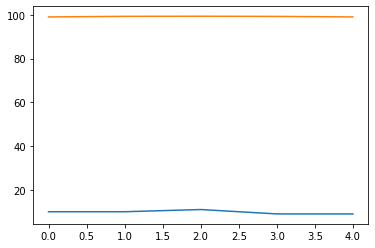

In [172]:
print(cross)
plt.plot(cross)
plt.show()

### Plots for results

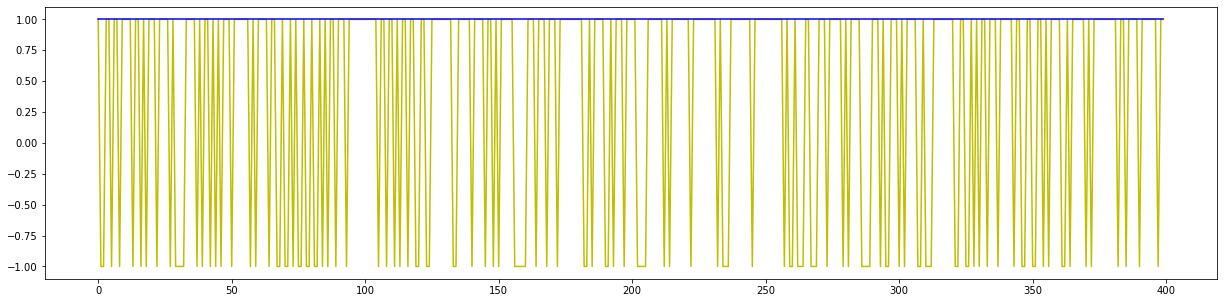

In [173]:
plt.figure(figsize=(21,5))
plt.plot(T_test[100:500],'-y')
plt.plot(predicted_values[100:500],'-b')

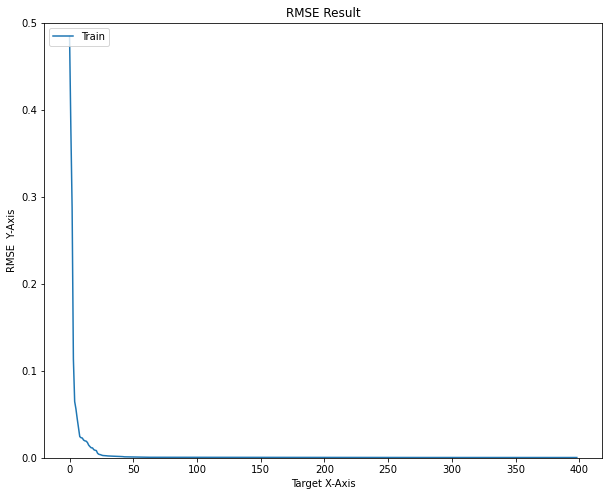

In [174]:
plt.figure(figsize=(10,8))
plt.plot(final_train_nn.ftrace)
plt.ylim(0,0.5)
plt.xlabel('Target X-Axis')
plt.ylabel('RMSE  Y-Axis')
plt.title('RMSE Result')
plt.legend(('Train','Test'),loc='upper left')

### Confusion Matrix

In [176]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(T_test ,predicted_values)
cf

array([[   0, 1443],
       [   0, 2519]])

# IV. Results

### Cross Validation Model Results

- The given is the CV result for Non Linear Regression for Regression Data: - [10, 99.987],
[7, 99.985], [9, 99.987], [10, 99.985],[10, 99.988]

- I have also plotted the actual and predicted ouput for each iteration of every fold so that we can visualize the correctness of the CV procedure.

- I have plotted the RMSE value in both Non Linear Regression data as well as Non Linear Logistic Regression Data.

- We can say that from the iteration result and the plots the 4 th iteration was giving us the better result comparing to the other result.

- The given is the CV result for NonLinear Logistic Regression for Classification Data: -
[[10, 99.0], [10, 99.26], [11, 99.31], [9, 99.23], [9, 99.0]]

- For classification data one can find that the 3fold of data worked good for classification data.

- One of the observation after executing data multiple time is the classification data gives better accuracy with multilayer Neural Network than a single layer linear model.

### Plot analysis

### Non linear Regression model plots:

As you can see in the plots of RMSE it starts from 0.5+ and get down below 0.2 and 0.1 for first 25 iteration of data points. And there after it remains in a constant state which is a good point for out neural network algorithm
From the plotting of Test and Actual data plots we get to know that the pattern is being followed by our prediction data compared to the actual data.

### Non linear Logistic Regression model plots:

For this model, you can see it repeats the result of our Non Linear Regression data. It tends to start with score of 0.5+ at the beginning of our iteration and then tends to be in a constant score of 0.2 and 0.1 score for remaining iterations.
RMS error is : 4782.119195503182
Accuracy is : 27.158001009591118

### Discussions about parameter/network structure choice

- In cross validation to check the accuracy I have selected number of layers as the variable entity in each iteration.

- The hidden unit is the important factor which was taking a lot of time when I used the number of layers as 128 so I reduced it to 64 for quicker implementation.

- Also taking all the features for cross validation took a lot of time to train so I reduced it to just important features in the dataset which I found as 3 in Assignment1.

- The parameter which is giving less error is chosen in cross validation for the training of the whole model, therefore we get better results at the end.Hence cross validation plays important role in case of paramter selection for the model.

### Discussion about the prediction results. Try to analyze what nonlinear regression model learned.

From the plotted graphs, it can be inferred that the RMSE error in the non-linear regression and non-linear logistic regression increases w.r.t to the number of samples.

Graphs plotted after every iteration in the cross validation improves. This clearly shows that model is learning after every iteration.

Once we get the best parameters corresponding to our data, predicted values are very similar to the actual values and hence line graph shows minimum deviation for prediction of regression data.

The Nonlinear Regression tries to learn the weights of the features which can be used to understand the distribution of the data and hence it helps to improve the accuracy while predicting the target value. And hence non-linear regression is giving more accuracy.

Optimality of the model depends on the multiple factors such as the distribution of the data, number of neurons(number of layers), learning rater etc.

In non-linear logistic regression, we first run the implementation on the toy data. As the implementation of the model runs successfully on the toy data, we apply the same on the classification data and analyze the results.

One important observation is that, the output that I am getting is biased as the cross validation may contain the data towards one class because of which the model is giving biased output. I think that this can be overcome if we have equal distributions of all the classes in the target variable.

# Conclusions

- In general the theory was a little difficult to understand it took a lot of time to learn all the neural netowrk its working.
- Implementing NeuralNet and visualizing it with more than two features was challenging.
- Another challenge about this assignment was to understand the NeuralNet class functions.
- Learnt the steepest gradient descent approach which is used in neural network.
- Get to know multiple activation function which performs same thing but with different formulaes.
- The cross validation method of taking random data set and checking which is best is one of the best method of selecting and testing data.

# References

Nonlinear Neural Network's Notebook by Dr. Lee

Neural Networks notebook

Assignment 1 and Assignment 2 codes

Matplotlib. Retrieved from https://matplotlib.org/

Seaborn. Retrieved from https://seaborn.pydata.org/

Wikipedia. Retrived from https://www.wikipedia.org/

Stackoverflow. Retrived from https://stackoverflow.com/

Towards Data Science Retrived from https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f

Investopedia Retrived from https://www.investopedia.com/terms/n/nonlinear-regression.asp

And More

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 10| Summary of CV & correctness of implementation
 | 5| Summary of nonlinear regression 
 | 5| Explanation of codes
 | 5| Summary of nonlinear logistic regression 
 | 5| Explanation of codes
 |10| Examination of correct implementation (NonlinearLogReg) with toy data.
40 | Results | Your Data
| 10| Presentaion of CV results
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
